In [1]:
import pandas as pd
import numpy as np

from numpy import array

import matplotlib.pyplot as plt

import statsmodels.api as sm

In [2]:
training_data_name = "tiling"

In [3]:
genome_df_chrV = pd.read_csv(f"/Users/Brody1/Dropbox/Northwestern/DNA_Cyclizability/data/Created/chrV_ir_lstm_cn_{training_data_name}_post_smoothed_matched.csv")

In [14]:
period = 10
C26_1period_abs_diff = [abs(np.mean(genome_df_chrV.loc[[i,i+period],"n=26"].values - 
                                    genome_df_chrV.loc[[i-period,i],"n=26"].values))
                                    for i in range(period, genome_df_chrV.shape[0]-period)]

for i in range(period):
    C26_1period_abs_diff.append(np.nan)
    C26_1period_abs_diff.insert(0,np.nan)

C26_1period_abs_diff = array(C26_1period_abs_diff)

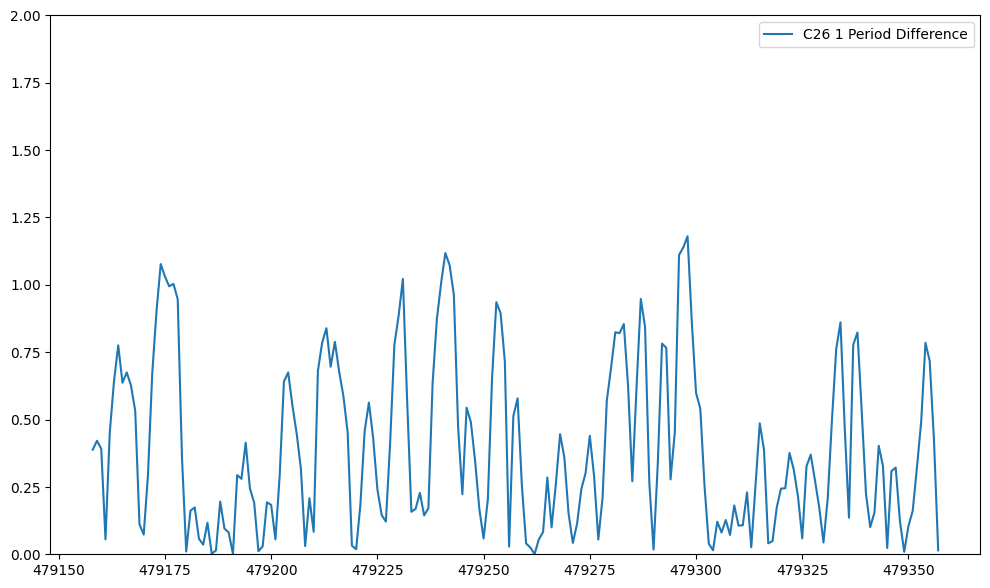

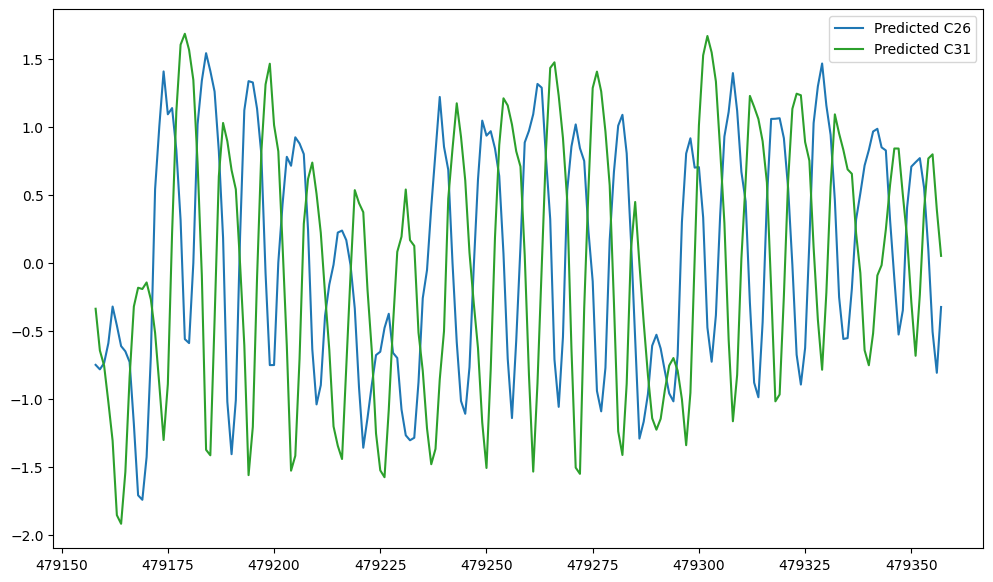

In [15]:
sequence_length = 200

# starting_point = 31259
# starting_point = 516127
# starting_point = 479158
# starting_point = np.random.randint(genome_df_chrV.shape[0]-sequence_length)

# starting_point = 250691 # Region on Slides
starting_point = 479158 # Region for Paper?


plt.figure(figsize=(12,7))

# plt.plot(list(range(starting_point, starting_point + sequence_length)),
#          C26_amp_estimates[range(starting_point, starting_point + sequence_length)], label="C26 Amplitude", color="C0")
# plt.plot(list(range(starting_point, starting_point + sequence_length)),
#          C31_amp_estimates[range(starting_point, starting_point + sequence_length)], label="C31 Amplitude", color="C2")

plt.plot(list(range(starting_point, starting_point + sequence_length)),
         C26_1period_abs_diff[range(starting_point, starting_point + sequence_length)], label="C26 1 Period Difference", color="C0")
# plt.plot(list(range(starting_point, starting_point + sequence_length)),
#          C31_1period_abs_diff[range(starting_point, starting_point + sequence_length)], label="C31 1 Period Difference", color="C2")

# plt.plot(list(range(starting_point, starting_point + sequence_length)),
#          C26_smooth_amp_estimates1[range(starting_point, starting_point + sequence_length)], label="C26 Amplitude Estimate", color="C0")
# plt.plot(list(range(starting_point, starting_point + sequence_length)),
#          C31_smooth_amp_estimates1[range(starting_point, starting_point + sequence_length)], label="C31 Amplitude Estimate", color="C2")

# plt.plot(list(range(starting_point, starting_point + sequence_length)),
#          C26_smooth_amp_estimates2[range(starting_point, starting_point + sequence_length)], label="C26 Amplitude Estimate", color="C0")
# plt.plot(list(range(starting_point, starting_point + sequence_length)),
#          C31_smooth_amp_estimates2[range(starting_point, starting_point + sequence_length)], label="C31 Amplitude Estimate", color="C2")

# plt.ylim((0, 2.5))
plt.ylim((0, 2))
# plt.ylim((0, 1))
plt.legend()
plt.show()



plt.figure(figsize=(12,7))

plt.plot(list(range(starting_point, starting_point + sequence_length)),
         genome_df_chrV["n=26"][range(starting_point, starting_point + sequence_length)], label="Predicted C26", color="C0")
plt.plot(list(range(starting_point, starting_point + sequence_length)),
         genome_df_chrV["n=31"][range(starting_point, starting_point + sequence_length)], label="Predicted C31", color="C2")

# plt.plot(list(range(starting_point, starting_point + sequence_length)),
#          genome_df_chrV["n=26"][range(starting_point, starting_point + sequence_length)], label="Predicted C26", color="C0", alpha=0.5)
# plt.plot(list(range(starting_point, starting_point + sequence_length)),
#          genome_df_chrV["n=31"][range(starting_point, starting_point + sequence_length)], label="Predicted C31", color="C2", alpha=0.5)
# plt.plot(list(range(starting_point, starting_point + sequence_length)),
#          genome_df_chrV["smooth_10.4bp_C26"][range(starting_point, starting_point + sequence_length)], label="Smooth C26", color="C0")
# plt.plot(list(range(starting_point, starting_point + sequence_length)),
#          genome_df_chrV["smooth_10.4bp_C31"][range(starting_point, starting_point + sequence_length)], label="Smooth C31", color="C2")

plt.legend()
plt.show()




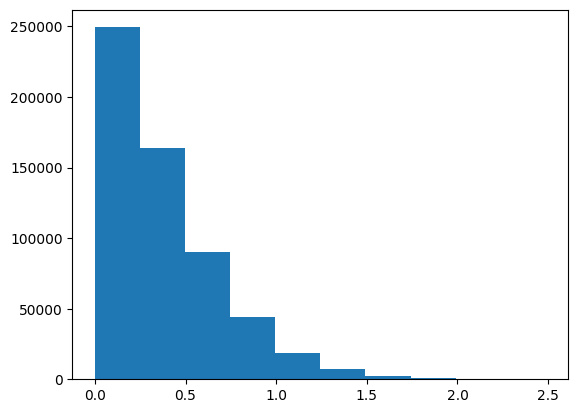

In [16]:
plt.hist(C26_1period_abs_diff)
plt.show()

In [4]:
genome_df_chrV.loc[[10,10+10],"n=26"]

10   -0.320842
20    0.998196
Name: n=26, dtype: float64

In [5]:
genome_df_chrV.loc[[10-10,10],"n=26"]

0    -0.453347
10   -0.320842
Name: n=26, dtype: float64

In [9]:
np.mean(abs(genome_df_chrV.loc[[10,10+10],"n=26"].values - genome_df_chrV.loc[[10-10,10],"n=26"].values))

0.7257716223597527